# Coffee Shop Sales Analysis

## Introduction 

## Import Library and Data

In [13]:
import pandas as pd 
import re


In [2]:
df = pd.read_excel('C:/Users/user/OneDrive/Documents/GitHub/Data-Analysis-Portfolio/coffee-shop-sales/Coffee Shop Sales.xlsx')

In [3]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [19]:
df['product_id'].unique()

array([32, 57, 59, 22, 77, 28, 39, 58, 56, 33, 51, 87, 47, 79, 42, 61, 69,
       40, 43, 76, 45, 71, 38, 26, 27, 29, 54, 55, 24, 60, 78, 44, 48, 23,
       46, 25, 34, 36, 74, 53, 41, 37, 50, 72, 35, 70, 73, 75, 31, 49, 52,
       30, 64, 12, 63,  6,  9, 65, 84, 19,  7,  1, 17, 10,  4, 15, 16,  3,
       20, 83, 18, 21, 13, 11,  5,  2, 81, 14,  8, 82], dtype=int64)

## General Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.shape

(149116, 11)

In [6]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.nunique().reset_index()

,index,0
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [9]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [10]:
df.describe(include= object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


## Pre-Processing

### Enhance Data Quality

In [14]:
# Define a function to extract the product size and product name
def extract_product_info(product_detail):
    # Define patterns for size and format
    size_pattern = r'(Rg|Lg|Sm|shot|syrup)$'
    
    # Match size
    size_match = re.search(size_pattern, product_detail)
    
    if size_match:
        # Map size abbreviations to full names
        size_map = {'Rg': 'regular', 'Lg': 'large', 'Sm': 'small', 'shot': 'shot', 'syrup': 'syrup'}
        product_size = size_map.get(size_match.group(), 'unknown')
        
        # Remove size from product name
        product_name = re.sub(size_pattern, '', product_detail).strip()
    else:
        # If no size is found, set size as 'unknown' and product name as original detail
        product_size = 'unknown'
        product_name = product_detail.strip()

    return product_size, product_name

In [15]:
# Apply the function to create the new columns
df[['product_size', 'product_name']] = df['product_detail'].apply(lambda x: pd.Series(extract_product_info(x)))

In [16]:
df[['product_detail', 'product_size', 'product_name']].head()

,product_detail,product_size,product_name
0,Ethiopia Rg,regular,Ethiopia
1,Spicy Eye Opener Chai Lg,large,Spicy Eye Opener Chai
2,Dark chocolate Lg,large,Dark chocolate
3,Our Old Time Diner Blend Sm,small,Our Old Time Diner Blend
4,Spicy Eye Opener Chai Lg,large,Spicy Eye Opener Chai


## Data Analysis

### Sales Trend Analysis

Analyze overall sales trends over time:
- **Revenue per day, week, or month**: Calculate total revenue (transaction_qty * unit_price) to understand sales patterns.
- **Peak sales periods**: Find the most active days and times for sales.

Create revenue column

In [20]:
df['revenue'] = df['transaction_qty'] * df['unit_price']

Group by date to get daily revenue

In [21]:
daily_revenue = df.groupby(df['transaction_date'].dt.date)['revenue'].sum()

<Axes: title={'center': 'Daily Revenue Trend'}, xlabel='Date', ylabel='Revenue'>

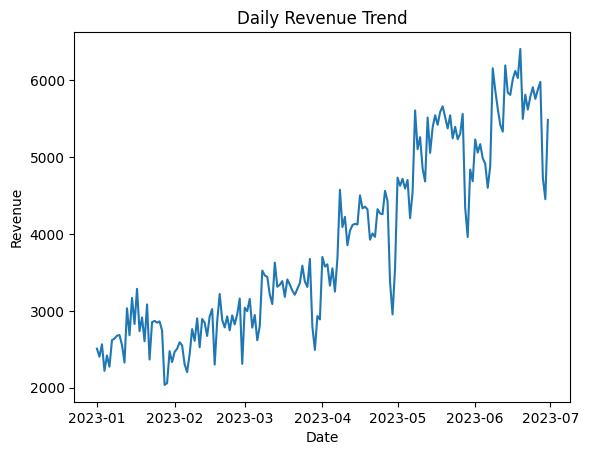

In [22]:
daily_revenue.plot(kind='line', title='Daily Revenue Trend', xlabel='Date', ylabel='Revenue')

### Store Performance Analysis

Classify stores based on sales performance:
- **Total revenue by store**: Identify which stores generate the most revenue.
- **Number of transactions per store**: Compare the number of transactions to the revenue to see which stores are most efficient.

In [23]:
store_performance = df.groupby('store_location')['revenue'].sum().sort_values(ascending=False)

In [24]:
transactions_per_store = df.groupby('store_location')['transaction_id'].count()

In [25]:
performance_summary = pd.DataFrame({'Total Revenue': store_performance, 'Total Transactions': transactions_per_store})
performance_summary

,Total Revenue,Total Transactions
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


### Product Classification and Performance

Identify top-performing products:
- **Revenue by product type/category**: Find which product types/categories generate the highest revenue.
- **Best-selling products**: Determine which individual products are sold most frequently.

In [26]:
category_performance = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
category_performance

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: revenue, dtype: float64

In [27]:
product_performance = df.groupby('product_type')['revenue'].sum().sort_values(ascending=False)
product_performance

product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Brewed herbal tea        47539.50
Premium brewed coffee    38781.15
Organic brewed coffee    37746.50
Scone                    36866.12
Drip coffee              31984.00
Pastry                   25655.99
Brewed Green tea         23852.50
Biscotti                 19793.53
Premium Beans            14583.50
Organic Beans             8509.50
Housewares                7444.00
Gourmet Beans             6798.00
Clothing                  6163.00
Regular syrup             6084.80
Espresso Beans            5560.25
Chai tea                  4301.25
House blend Beans         3294.00
Herbal tea                2729.75
Drinking Chocolate        2728.04
Black tea                 2711.85
Sugar free syrup          2324.00
Organic Chocolate         1679.60
Green tea                 1470.75
Green beans               1340.00
N

In [ ]:
best_selling_products = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=False)
best_selling_products

In [28]:
# Best-selling products by quantity
best_selling_products = df.groupby('product_name')['transaction_qty'].sum().sort_values(ascending=False)
best_selling_products

product_name
Ethiopia                        13271
Our Old Time Diner Blend        13074
Columbian Medium Roast          13068
Brazilian                       13012
Jamaican Coffee River           12431
Morning Sunrise Chai             9157
Latte                            9099
Earl Grey                        9095
Peppermint                       9067
Sustainably Grown Organic        9003
Serenity Green Tea               8856
Traditional Blend Chai           8839
Dark chocolate                   8793
Spicy Eye Opener Chai            8697
English Breakfast                8670
Lemon Grass                      8566
Cappuccino                       8417
Espresso                         4165
Ouro Brasileiro                  3262
Chocolate Croissant              3096
Sugar Free Vanilla               2905
Chocolate                        2658
Carmel                           2576
Ginger Scone                     2540
Hazelnut                         2372
Cranberry Scone                  2092

In [ ]:
# Classify products based on revenue contribution
df['Product Performance'] = pd.qcut(df.groupby('product_id')['revenue'].transform('sum'), q=3, labels=['Low', 'Medium', 'High'])
df['Product Performance'].value_counts()

In [33]:
# Group by product_id to calculate total revenue and count of records
df_performance = df.groupby('product_name').agg(
    total_revenue=('revenue', 'sum'),
    record_count=('transaction_id', 'count')
).reset_index()

In [34]:
# Classify products based on revenue contribution
df_performance['Product Performance'] = pd.qcut(df_performance['total_revenue'], q=3, labels=['Low', 'Medium', 'High'])

# Sort df_performance by total revenue
df_performance = df_performance.sort_values(by='total_revenue', ascending=False)

df_performance

,product_name,total_revenue,record_count,Product Performance
18,Ethiopia,42304.10,8658,High
43,Sustainably Grown Organic,39065.10,6024,High
28,Jamaican Coffee River,38781.15,8135,High
1,Brazilian,37746.50,8489,High
30,Latte,36369.75,5886,High
13,Dark chocolate,35785.70,5783,High
35,Our Old Time Diner Blend,35278.00,8660,High
10,Columbian Medium Roast,34528.50,8620,High
3,Cappuccino,33639.25,5565,High
32,Morning Sunrise Chai,30587.50,6024,High


### Product or Store Classification for Sale Performance

To classify products or stores based on sales performance, you can rank them:
- **Top 10 Stores and Products** based on revenue.
- **Classify stores** as *'High'*, *'Medium'*, or *'Low'* performing based on predefined revenue thresholds.

In [23]:
# Store classification based on revenue thresholds
performance_summary['Store Classification'] = pd.cut(performance_summary['Total Revenue'],
                                                     bins=[0, 50000, 100000, performance_summary['Total Revenue'].max()],
                                                     labels=['Low', 'Medium', 'High'])

In [24]:
# Classify products based on revenue contribution
df['Product Performance'] = pd.qcut(df.groupby('product_id')['revenue'].transform('sum'), q=3, labels=['Low', 'Medium', 'High'])

In [ ]:
performance_summary

In [ ]:
df[['product_detail', 'Product Performance']].drop_duplicates()
